<a href="https://colab.research.google.com/github/lucasanso/knapsack-problem/blob/main/codigos/graficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

for root, dirs, files in os.walk('.'):
    for file in files:
        print(os.path.join(root, file))

./.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
./.config/.last_opt_in_prompt.yaml
./.config/.last_survey_prompt.yaml
./.config/.last_update_check.json
./.config/gce
./.config/config_sentinel
./.config/active_config
./.config/default_configs.db
./.config/logs/2026.01.16/14.24.28.646070.log
./.config/logs/2026.01.16/14.24.03.314209.log
./.config/logs/2026.01.16/14.24.29.392089.log
./.config/logs/2026.01.16/14.23.31.981136.log
./.config/logs/2026.01.16/14.24.18.954466.log
./.config/logs/2026.01.16/14.24.13.071214.log
./.config/configurations/config_default
./sample_data/anscombe.json
./sample_data/README.md
./sample_data/mnist_test.csv
./sample_data/california_housing_train.csv
./sample_data/california_housing_test.csv
./sample_data/mnist_train_small.csv


Please provide the URL of your Git repository in the cell below. Once you've entered it, run the cell to clone the repository.

In [3]:
repo_url = "https://github.com/lucasanso/knapsack-problem" #@param {type:"string"}

!git clone {repo_url}

Cloning https://github.com/lucasanso/knapsack-problem into knapsack-problem...
fatal: destination path 'knapsack-problem' already exists and is not an empty directory.
Repository 'knapsack-problem' cloned successfully.
You can now run the `os.walk` command again to see the files within the cloned directory.


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dir = './knapsack-problem/codigos'
df_naive = pd.read_csv(f'{dir}/naive_results.csv')
df_memo = pd.read_csv(f'{dir}/memo_results.csv')
# display(df.head())

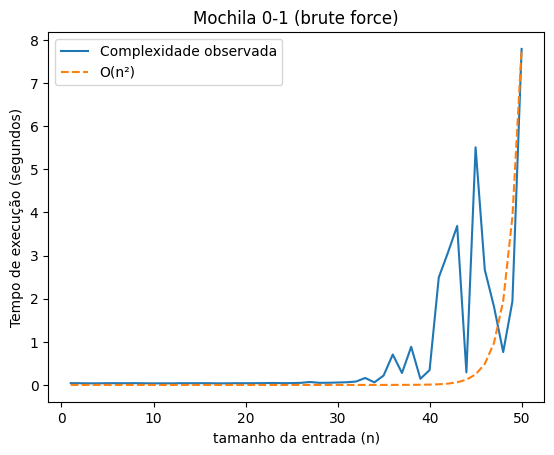

In [37]:
x = df_naive["n"]
y = df_naive["time"]

plt.plot(x, y, label="Complexidade observada")
plt.xlabel('tamanho da entrada (n)')
plt.ylabel('Tempo de execução (segundos)')

exponential = 2**x
exponential *= y.max() / exponential.max()
plt.plot(x, exponential, '--', label="O(n²)")

plt.title("Mochila 0-1 (brute force)")

plt.legend()
plt.show()

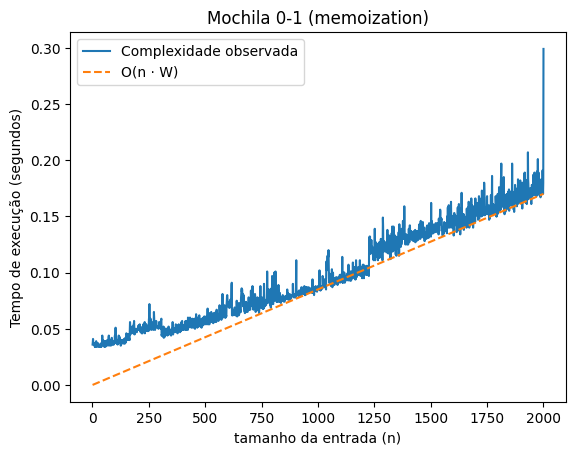

In [38]:
x_memo = df_memo["n"]
y_memo = df_memo["time"]

plt.plot(x_memo, y_memo, label="Complexidade observada")
plt.xlabel('tamanho da entrada (n)')
plt.ylabel('Tempo de execução (segundos)')

W = 5000 # W (Peso maximo da mochila) usado no script de execução do algoritmo
expected = x_memo * W
expected *= y_memo.max() / expected.max()
scale = np.percentile(y_memo, 95) / expected.max()
expected_scaled = expected * scale
plt.plot(x_memo, expected_scaled, '--', label="O(n · W)")

plt.title("Mochila 0-1 (memoization)")

plt.legend()
plt.show()